In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
class LogisticRegression:
    def __init__(self, lr = 0.01, n_epochs = 100, batch_size = 1, shuffle = False, threshold = 0.5, w = None, random_sate = 42, verbose = 1):
        self.lr = lr # learning rate - speed of learning of model
        self.n_epochs = n_epochs # the number of learning
        self.batch_size = batch_size # the number of sample select from train set to training
        self.shuffle = shuffle # Do you want swap all sample in training of each epoch?
        self.threshold = threshold # threshold to inference of model which decision the class of sample
        self.Losses = [ ] # list loss of model of each epoch
        self.accuracies = [] # list accuracy of model of each epoch
        self.Nsamples = None # the number of samples which has in training set
        self.Nfeatures  = None # the number of feature which has in training set
        self.w = w # matrix weight of models
        np.random.seed(random_sate)
        if verbose == 0 or verbose == 1 or verbose == 2:
            self.verbose = verbose # the parameter allows type of the print in training process
        else: 
            raise ValueError("verbose must be 0 - don't print\n1 - print the process of batch in each epoch\n2 - print the proccess of epoch ")
        # Số batch sẽ được lấy ra huấn luyện dựa trên batch_size và số sample huấn luyện
        self.batch_number = None 
    
    # ----------------------------------------------------------------------------------------------
    # function to check dimensional of matrix 
    def CheckDim(self,X):
        if X.ndim == 1:
            raise ValueError("X must be 2 - Dimensional")
        return 1
        
    #-----------------------------------------------------------------------------------------------
    # function to add feature have value = 1 on head each sample
    def addFeature1(self,X):
        if self.CheckDim:
            if X.shape[1] == self.Nfeatures +1: return X
            else:
                feature1 = np.ones((X.shape[0],1))
                return np.concatenate((feature1,X), axis = 1)

    #----------------------------------------------------------------------------------------------
    # activate function - sigmoid function
    def sigmoid(self,z):
        return 1/(1+np.e**(-z))
    
    # ----------------------------------------------------------------------------------------------
    # function to compute y_pred
    def predict_prob(self,X):
        X = self.addFeature1(X)
        # compute z
        z = X@self.w
        return self.sigmoid(z)

    # -----------------------------------------------------------------------------------------------
    # function to desion the class of sample - inference of model
    def predict(self,X):
        y_prob = self.predict_prob(X)
        return np.where(y_prob>self.threshold, 1, 0)

    # -----------------------------------------------------------------------------------------------
    # function to compute Loss
    def Compute_Loss(self, y, y_prob):
        BCE = np.mean(-y*np.log(y_prob) - (1-y)*np.log(1-y_prob))
        return BCE

    # -----------------------------------------------------------------------------------------------
    # function to compute derivative dL/dw
    def dL_dw(self,X, y, y_prob):
        return X.T@(y_prob - y)*(1/X.shape[0])

    # ----------------------------------------------------------------------------------------------
    # function to train model
    def fit(self, X, y):
        if self.CheckDim(X):
            self.Nsamples, self.Nfeatures = X.shape
        # add features have value = 1 for head each sample
        X = self.addFeature1(X)
        # reshape array y -> matrix (m,1)
        y = y.reshape(-1,1)
        if self.w is None:
            self.w = np.random.uniform(low=-1, high=1, size=(self.Nfeatures +1 ,1))
        else: self.CheckDim(self.w)
        data_train = np.concatenate((X,y), axis = 1) 
        for epoch in range(self.n_epochs):
            if self.shuffle: np.random.shuffle(data_train)
            loss_epoch = [] # loss of 1 epoch
            accuracy_epoch = [] # accuracy of 1 epoch
            self.batch_number = (self.Nsamples//self.batch_size) +1 if self.Nsamples % self.batch_size != 0 else self.Nsamples//self.batch_size
            batch_cout = 1 # variable to cout the batch number of epoch
            for i in range(0, self.Nsamples, self.batch_size):
                batch = data_train[i:i+self.batch_size]
                X_train, y_train = batch[:,:-1], batch[:,-1].reshape(-1,1)
                y_prob = self.predict_prob(X_train)
                # decision the class
                y_pred = self.predict(X_train)
                # accuracy of 1 batch
                accuracy = np.mean(y_pred == y_train)
                accuracy_epoch.append(accuracy)
                # loss of 1 batch 
                loss = self.Compute_Loss(y_train,y_prob)
                loss_epoch.append(loss)
                if self.verbose == 1:
                    if batch_cout == 1:
                        print(f"Epoch {epoch +1:<3}/{self.n_epochs}")
                    print(f"==> [{batch_cout}/{self.batch_number:<3}] =========== Loss = {loss_epoch[-1]:<10.4f} ============ Accuracy  = {accuracy_epoch[-1]:<10.4f} ===== w = {str(self.w.flatten())}")
                # compute derivative 
                dL_dw = self.dL_dw(X_train,y_train, y_prob)
                # update weight 
                self.w -= self.lr*dL_dw
                batch_cout +=1
            self.Losses.append(sum(loss_epoch)/len(loss_epoch))
            self.accuracies.append(sum(accuracy_epoch)/len(accuracy_epoch))
            if self.verbose == 2:
                print(f"Epoch {epoch+1:<3}/{self.n_epochs} ========== Loss = {self.Losses[-1].item():<12.4f}==============  Accuracy = {self.accuracies[-1].item():<10.4f} ===== w = {str(self.w.flatten())}")

# One sample - vectorization for logistic regression

In [3]:
FILE_PATH1 = 'data/iris_1D.csv'

In [4]:
df = pd.read_csv(FILE_PATH1)
df

,Petal_Length,Label
0,1.4,0.0
1,1.0,0.0
2,1.5,0.0
3,3.0,1.0
4,3.8,1.0
5,4.1,1.0


In [5]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [6]:
X, y

(array([[1.4],
        [1. ],
        [1.5],
        [3. ],
        [3.8],
        [4.1]]),
 array([0., 0., 0., 1., 1., 1.]))

In [7]:
clf = LogisticRegression(n_epochs=200,verbose=0, batch_size=1)

In [8]:
clf.fit(X,y)

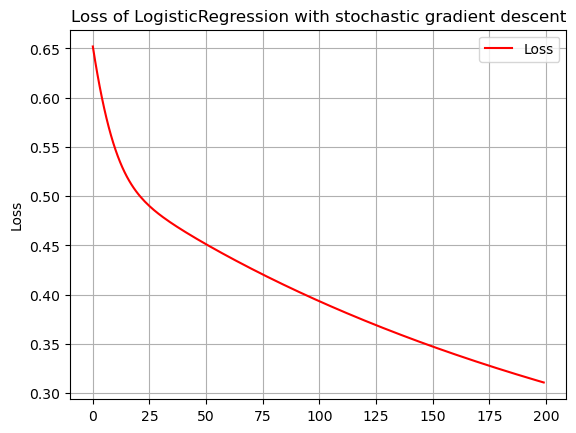

In [9]:
plt.title("Loss of LogisticRegression with stochastic gradient descent")
plt.plot(clf.Losses,'r', label = "Loss")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

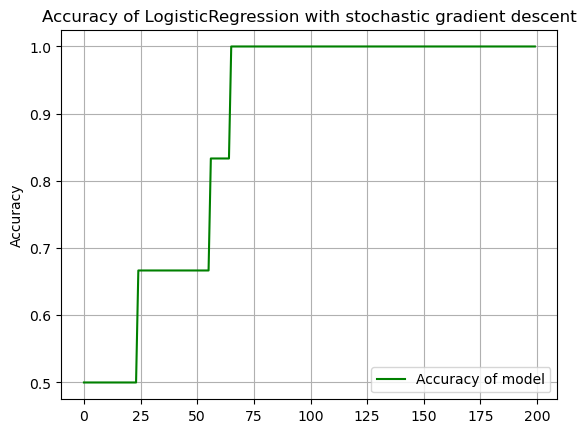

In [10]:
plt.title("Accuracy of LogisticRegression with stochastic gradient descent")
plt.plot(clf.accuracies,'g', label = "Accuracy of model")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# Vectorization for Logistic Regression with mini-batch gradient descent

In [11]:
FILE_PATH2 = 'data/iris_full.csv'

In [12]:
df = pd.read_csv(FILE_PATH2)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Describe data set

In [13]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000,0.500000
std,0.641698,0.476057,1.448565,0.566288,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sepal_Length   100 non-null    float64
 1    Sepal_Width   100 non-null    float64
 2    Petal_Length  100 non-null    float64
 3    Petal_Width   100 non-null    float64
 4    Label         100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


# Take features X and labels y

In [15]:
X, y = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()

In [17]:
# take the shape of data train
X.shape

(100, 4)

In [18]:
y.shape

(100,)

# split train set and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
clf2 = LogisticRegression(n_epochs=100, batch_size=16, lr=0.01, shuffle=True, verbose=1)

In [26]:
clf2.fit(X_train,y_train)

Epoch 1  /100
==> [1/5  ] =========== Loss = 1.8535     ============ Accuracy  = 0.6875     ===== w = [-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
==> [2/5  ] =========== Loss = 3.1753     ============ Accuracy  = 0.4375     ===== w = [-0.25402076  0.88593268  0.45343253  0.19270239 -0.68887841]
==> [3/5  ] =========== Loss = 2.8536     ============ Accuracy  = 0.5000     ===== w = [-0.25961377  0.85877933  0.43521214  0.18470817 -0.69017533]
==> [4/5  ] =========== Loss = 2.7264     ============ Accuracy  = 0.5000     ===== w = [-0.26458409  0.83362481  0.41793211  0.17784776 -0.69127985]
==> [5/5  ] =========== Loss = 2.6053     ============ Accuracy  = 0.5000     ===== w = [-0.26953955  0.80873475  0.40075396  0.17034199 -0.69268457]
Epoch 2  /100
==> [1/5  ] =========== Loss = 2.5692     ============ Accuracy  = 0.5000     ===== w = [-0.27448202  0.78428174  0.38405017  0.16311857 -0.69364395]
==> [2/5  ] =========== Loss = 2.6268     ============ Accuracy  = 0.437

In [27]:
y_pred = clf2.predict(X_test)

In [28]:
clf2.predict_prob(X_test)

array([[0.96338556],
       [0.90608889],
       [0.91967205],
       [0.18977643],
       [0.1808541 ],
       [0.16089967],
       [0.07992951],
       [0.87660851],
       [0.12882548],
       [0.13436304],
       [0.14618864],
       [0.2202306 ],
       [0.93929922],
       [0.07861584],
       [0.92694991],
       [0.12517981],
       [0.94350614],
       [0.94562387],
       [0.19485117],
       [0.15549744]])

# Hiển thị các độ đo đánh giá

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



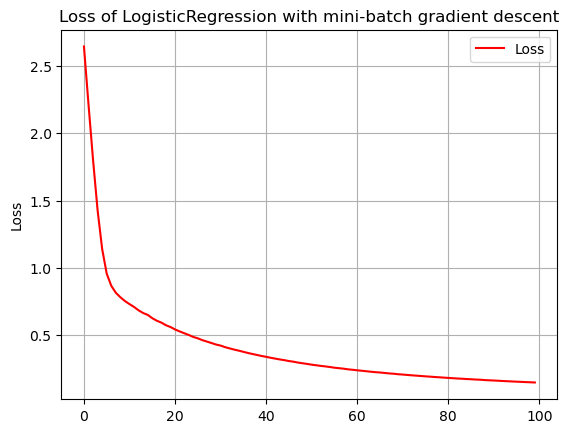

In [34]:
plt.title("Loss of LogisticRegression with mini-batch gradient descent")
plt.plot(clf2.Losses,'r', label = "Loss")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()